Importing Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/museMonitor_2024-06-05--17-23-37_9208698270315378717.csv
/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/museMonitor_2024-06-22--18-41-35_2861114036213037750.csv
/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/museMonitor_2024-06-21--20-00-24_6554922359716231338.csv
/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/museMonitor_2024-06-06--12-56-03_1872932237480975429.csv
/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/museMonitor_2024-06-20--22-56-06_1640398272947211195.csv
/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/museMonitor_2024-06-12--13-38-16_3222374500720036221.csv
/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/museMonitor_2024-06-17--21-42-37_7129358710896752933.csv
/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/museMonitor_2024-06-21--23-10-14_7413883026386137496.csv
/kaggle/input/eeg-muse2-motor-im

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Define the directory path
directory_path = '/kaggle/input/eeg-muse2-motor-imagery-brain-electrical-activity/'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# Read and concatenate all CSV files
combined_df = pd.concat([pd.read_csv(os.path.join(directory_path, file)) for file in csv_files], ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2024-06-05 17:23:37.961,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,...,0.276642,0.18692,-0.986938,1.0,1.0,1.0,1.0,1.0,80.0,NaN
1,2024-06-05 17:23:37.967,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,...,0.276642,0.18692,-0.986938,1.0,1.0,1.0,1.0,1.0,80.0,NaN
2,2024-06-05 17:23:37.968,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,...,0.276642,0.18692,-0.986938,1.0,1.0,1.0,1.0,1.0,80.0,NaN
3,2024-06-05 17:23:37.969,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,...,0.276642,0.18692,-0.986938,1.0,1.0,1.0,1.0,1.0,80.0,NaN
4,2024-06-05 17:23:37.969,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,...,0.276642,0.18692,-0.986938,1.0,1.0,1.0,1.0,1.0,80.0,NaN


Pre Processing

In [3]:
# Calculate the percentage of missing values in each column
missing_percentage = combined_df.isnull().sum() / len(combined_df) * 100

# Display the percentage of missing values
missing_percentage

TimeStamp           0.000000
Delta_TP9           0.054650
Delta_AF7           0.054650
Delta_AF8           0.054650
Delta_TP10          0.054650
Theta_TP9           0.054650
Theta_AF7           0.054650
Theta_AF8           0.054650
Theta_TP10          0.054650
Alpha_TP9           0.054650
Alpha_AF7           0.054650
Alpha_AF8           0.054650
Alpha_TP10          0.054650
Beta_TP9            0.054650
Beta_AF7            0.054650
Beta_AF8            0.054650
Beta_TP10           0.054650
Gamma_TP9           0.054650
Gamma_AF7           0.054650
Gamma_AF8           0.054650
Gamma_TP10          0.054650
RAW_TP9             6.468099
RAW_AF7             8.872474
RAW_AF8             3.711213
RAW_TP10            6.853946
AUX_RIGHT          10.544188
Mellow              0.054650
Concentration       0.054650
Accelerometer_X     0.054650
Accelerometer_Y     0.054650
Accelerometer_Z     0.054650
Gyro_X              0.054650
Gyro_Y              0.054650
Gyro_Z              0.054650
HeadBandOn    

In [4]:
features = [
    'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
    'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
    'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10',
    'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10',
    'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10'
]
data = combined_df[features]

data.head()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,Alpha_AF8,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10
0,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,0.163217,0.206969,0.918828,0.546408,0.048114,-0.065712,0.563969,-0.047588,-0.223798,-0.184201,0.369968
1,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,0.163217,0.206969,0.918828,0.546408,0.048114,-0.065712,0.563969,-0.047588,-0.223798,-0.184201,0.369968
2,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,0.163217,0.206969,0.918828,0.546408,0.048114,-0.065712,0.563969,-0.047588,-0.223798,-0.184201,0.369968
3,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,0.163217,0.206969,0.918828,0.546408,0.048114,-0.065712,0.563969,-0.047588,-0.223798,-0.184201,0.369968
4,0.329342,-0.259216,-0.090011,0.551984,0.427443,-0.264384,-0.045775,0.591313,1.004643,0.163217,0.206969,0.918828,0.546408,0.048114,-0.065712,0.563969,-0.047588,-0.223798,-0.184201,0.369968


KeyboardInterrupt: 

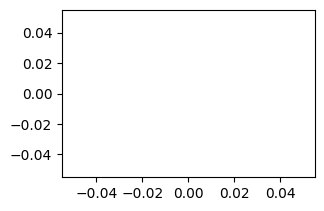

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Visualization 1: Distribution Plots for Frequency Bands ---
# Plot histograms to check for outliers and infinite values
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col].dropna(), bins=50, kde=True)
    plt.title(col, fontsize=10)
    plt.xlabel('Value')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.close()

In [6]:


# Replace infinite values with NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Handle missing values (fill with mean)
data = data.fillna(data.mean())

In [7]:
data.isnull().any()

Delta_TP9     False
Delta_AF7     False
Delta_AF8     False
Delta_TP10    False
Theta_TP9     False
Theta_AF7     False
Theta_AF8     False
Theta_TP10    False
Alpha_TP9     False
Alpha_AF7     False
Alpha_AF8     False
Alpha_TP10    False
Beta_TP9      False
Beta_AF7      False
Beta_AF8      False
Beta_TP10     False
Gamma_TP9     False
Gamma_AF7     False
Gamma_AF8     False
Gamma_TP10    False
dtype: bool

In [8]:
# Function to create sequences of 32 time steps
def create_sequences(data, seq_length=32):
    sequences = []
    for i in range(0, len(data) - seq_length + 1, seq_length):  # Non-overlapping sequences
        sequence = data.iloc[i:i + seq_length].values
        sequences.append(sequence)
    return np.array(sequences)

In [9]:
# Create sequences (shape: [n_sequences, 32, 20])
X_sequences = create_sequences(data)

In [10]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Reshape to 2D for scaling: [n_sequences * 32, 120]
X_2d = X_sequences.reshape(-1, X_sequences.shape[-1])
X_scaled_2d = scaler.fit_transform(X_2d)
# Reshape back to 3D: [n_sequences, 32, 20]
X_scaled = X_scaled_2d.reshape(X_sequences.shape)

In [11]:
# --- Clustering on Sequences ---
from sklearn.cluster import KMeans

# Apply K-means to flattened sequences
X_flat = X_scaled.reshape(X_scaled.shape[0], -1)  # [n_sequences, 32 * 20]
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_flat)

# Check cluster distribution
print("Cluster Distribution:\n", pd.Series(cluster_labels).value_counts())



Cluster Distribution:
 0    181250
1     35869
Name: count, dtype: int64


In [67]:
from sklearn.utils import resample
from sklearn.metrics import silhouette_score

# Evaluate clustering
X_sampled, y_sampled = resample(X_flat, cluster_labels, n_samples=1000, random_state=42)
score = silhouette_score(X_sampled, y_sampled)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5875456857737338


In [12]:
from sklearn.model_selection import train_test_split

y = cluster_labels
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout

# Build model
model = Sequential([
    LSTM(64, input_shape=(32, 20), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

2025-05-23 14:31:44.182135: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748010704.498879      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748010704.593937      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-23 14:32:04.031339: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          21,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,385 (95.25 KB)

 Trainable params: 24,385 (95.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)



Epoch 1/10
4343/4343 ━━━━━━━━━━━━━━━━━━━━ 96s 21ms/step - accuracy: 0.9704 - loss: 0.0553 - val_accuracy: 0.9975 - val_loss: 0.0050
Epoch 2/10
4343/4343 ━━━━━━━━━━━━━━━━━━━━ 91s 21ms/step - accuracy: 0.9979 - loss: 0.0056 - val_accuracy: 0.9989 - val_loss: 0.0039
Epoch 3/10
4343/4343 ━━━━━━━━━━━━━━━━━━━━ 91s 21ms/step - accuracy: 0.9984 - loss: 0.0043 - val_accuracy: 0.9991 - val_loss: 0.0027
Epoch 4/10
4343/4343 ━━━━━━━━━━━━━━━━━━━━ 91s 21ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.9991 - val_loss: 0.0021
Epoch 5/10
4343/4343 ━━━━━━━━━━━━━━━━━━━━ 89s 21ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9988 - val_loss: 0.0035
Epoch 6/10
4343/4343 ━━━━━━━━━━━━━━━━━━━━ 91s 21ms/step - accuracy: 0.9992 - loss: 0.0027 - val_accuracy: 0.9994 - val_loss: 0.0023
Epoch 7/10
4343/4343 ━━━━━━━━━━━━━━━━━━━━ 89s 21ms/step - accuracy: 0.9989 - loss: 0.0029 - val_accuracy: 0.9989 - val_loss: 0.0020
Epoch 8/10
4343/4343 ━━━━━━━━━━━━━━━━━━━━ 89s 21ms/step - accuracy: 0.9991 -

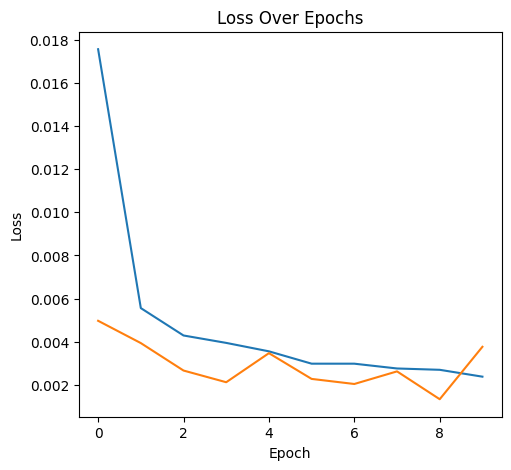

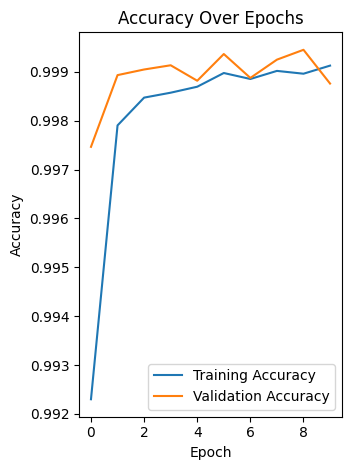

In [15]:
# --- Visualization 6: Training History Plot ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

In [16]:
# --- Evaluate Model ---
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

1357/1357 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9995 - loss: 0.0011
Test Accuracy: 0.9996


In [19]:
# Generate EEG-like data: 5 sequences, each 32 time steps, 16 features
n_sequences = 5
seq_length = 32
n_features = 20
t = np.linspace(0, 1, seq_length)  # Time points for 32 steps

# Simulate frequency bands with different frequencies and amplitudes
data = np.zeros((n_sequences * seq_length, n_features))
feature_names = ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
                 'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10',
                 'Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10',
                 'Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10',
                   'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10']

for seq in range(n_sequences):
    start_idx = seq * seq_length
    end_idx = (seq + 1) * seq_length
    # Vary patterns per sequence
    for i, feat in enumerate(feature_names):
        if 'Delta' in feat:
            # Delta: slow waves, high amplitude
            signal = 100 * np.sin(2 * np.pi * 2 * t)  # 0.5-4 Hz
        elif 'Theta' in feat:
            signal = 50 * np.sin(2 * np.pi * 6 * t)   # 4-8 Hz
        elif 'Alpha' in feat:
            signal = 30 * np.sin(2 * np.pi * 9 * t)  # 8-13 Hz
        elif 'Beta' in feat:
            signal = 15 * np.sin(2 * np.pi * 15 * t)  # 13-30 Hz
        else:
            signal = 10 * np.sin(2 * np.pi * 40 * t ) # above 30 Hz
        # Add noise and sequence-specific variation
        signal += np.random.normal(0, 5, seq_length) + seq * 10
        data[start_idx:end_idx, i] = signal

In [20]:
# Create DataFrame
user_input = pd.DataFrame(data, columns=feature_names)

In [21]:
# Preprocess user input
print("Checking for NaN values in user input:\n", user_input.isna().sum())
print("Checking for infinite values in user input:\n", np.isinf(user_input).sum())
user_input = user_input.replace([np.inf, -np.inf], np.nan)
user_input = user_input.fillna(user_input.median())

Checking for NaN values in user input:
 Delta_TP9     0
Delta_AF7     0
Delta_AF8     0
Delta_TP10    0
Theta_TP9     0
Theta_AF7     0
Theta_AF8     0
Theta_TP10    0
Alpha_TP9     0
Alpha_AF7     0
Alpha_AF8     0
Alpha_TP10    0
Beta_TP9      0
Beta_AF7      0
Beta_AF8      0
Beta_TP10     0
Gamma_TP9     0
Gamma_AF7     0
Gamma_AF8     0
Gamma_TP10    0
dtype: int64
Checking for infinite values in user input:
 Delta_TP9     0
Delta_AF7     0
Delta_AF8     0
Delta_TP10    0
Theta_TP9     0
Theta_AF7     0
Theta_AF8     0
Theta_TP10    0
Alpha_TP9     0
Alpha_AF7     0
Alpha_AF8     0
Alpha_TP10    0
Beta_TP9      0
Beta_AF7      0
Beta_AF8      0
Beta_TP10     0
Gamma_TP9     0
Gamma_AF7     0
Gamma_AF8     0
Gamma_TP10    0
dtype: int64


In [22]:
# Create sequences
def create_sequences(data, seq_length=32):
    sequences = []
    for i in range(0, len(data) - seq_length + 1, seq_length):
        sequence = data.iloc[i:i + seq_length][feature_names].values
        sequences.append(sequence)
    return np.array(sequences)

In [23]:
user_sequences = create_sequences(user_input)  # Shape: [5, 32, 16]
if user_sequences.shape[0] == 0:
    raise ValueError("Failed to create sequences")

In [24]:
# Scale sequences
user_2d = user_sequences.reshape(-1, user_sequences.shape[-1])
user_2d = np.clip(user_2d, -1e6, 1e6)
user_scaled_2d = scaler.transform(user_2d)
user_scaled = user_scaled_2d.reshape(user_sequences.shape)

In [25]:
# Make predictions
predictions = model.predict(user_scaled, batch_size=32, verbose=0)
predicted_labels = (predictions > 0.5).astype(int).flatten()

In [26]:
# Print predictions
print("Predictions for", len(predicted_labels), "sequences:")
for i, (prob, label) in enumerate(zip(predictions.flatten(), predicted_labels)):
    print(f"Sequence {i+1}: Probability={prob:.4f}, Predicted Label={label}")

Predictions for 5 sequences:
Sequence 1: Probability=0.1639, Predicted Label=0
Sequence 2: Probability=0.0708, Predicted Label=0
Sequence 3: Probability=1.0000, Predicted Label=1
Sequence 4: Probability=1.0000, Predicted Label=1
Sequence 5: Probability=1.0000, Predicted Label=1


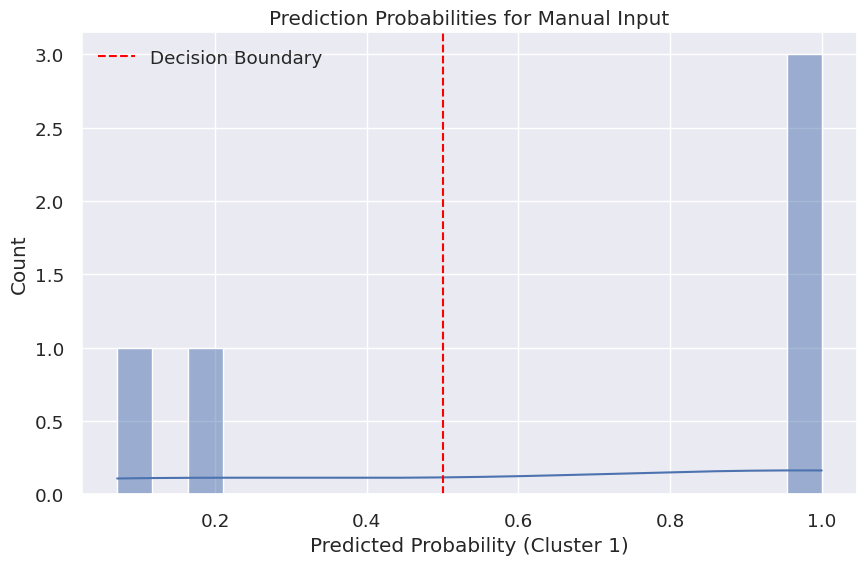

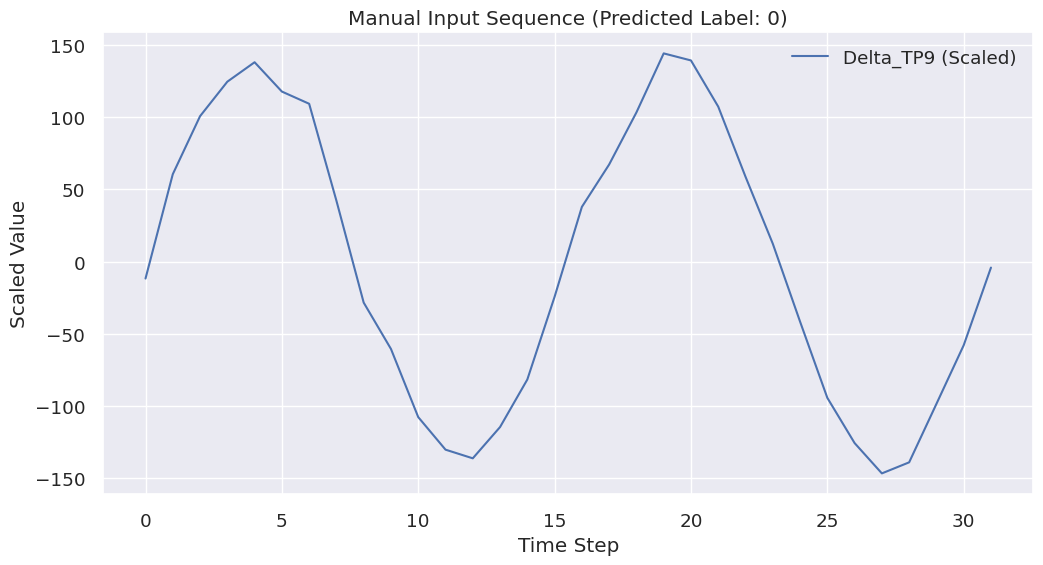

In [27]:
plt.style.use('seaborn')
sns.set(font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.histplot(predictions.flatten(), bins=20, kde=True)
plt.title('Prediction Probabilities for Manual Input')
plt.xlabel('Predicted Probability (Cluster 1)')
plt.ylabel('Count')
plt.axvline(0.5, color='red', linestyle='--', label='Decision Boundary')
plt.legend()
plt.show()
plt.close()

# Visualization 2: Sample Sequence with Predicted Label
plt.figure(figsize=(12, 6))
plt.plot(user_scaled[0, :, 0], label='Delta_TP9 (Scaled)')
plt.title(f'Manual Input Sequence (Predicted Label: {predicted_labels[0]})')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()
plt.close()

In [28]:
model.save('/kaggle/working/eeg_model.h5')

import joblib
joblib.dump(scaler, '/kaggle/working/scaler.pkl')
joblib.dump(features, '/kaggle/working/features.pkl')

['/kaggle/working/features.pkl']